In [7]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [9]:
df = pd.read_csv("C:/Final Project/dataset_files/train.csv", nrows=25000)
#df= pd.read_csv('../input/new-york-city-taxi-fare-prediction/train.csv', skiprows=lambda x: x%2 == 1)
df_test = pd.read_csv("C:/Final Project/dataset_files/test.csv")
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [10]:
df.shape #data_wrangling

(25000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                25000 non-null  object 
 1   fare_amount        25000 non-null  float64
 2   pickup_datetime    25000 non-null  object 
 3   pickup_longitude   25000 non-null  float64
 4   pickup_latitude    25000 non-null  float64
 5   dropoff_longitude  25000 non-null  float64
 6   dropoff_latitude   25000 non-null  float64
 7   passenger_count    25000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 1.5+ MB


In [12]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,11.326657,-72.508540,39.934394,-72.511338,39.923637,1.66496
std,9.531149,10.420340,6.516562,10.407299,6.093153,1.28638
min,-3.000000,-75.414728,-74.006893,-84.654241,-74.006377,0.00000
25%,6.000000,-73.992160,40.734747,-73.991195,40.734566,1.00000
50%,8.500000,-73.981768,40.752727,-73.980197,40.753631,1.00000
75%,12.500000,-73.967050,40.767296,-73.963645,40.768229,2.00000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.00000


In [13]:
df.isnull().sum() #Checking for Missing Values

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [14]:
df_test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [15]:
df.nunique()

key                  25000
fare_amount            529
pickup_datetime      24890
pickup_longitude     20007
pickup_latitude      21020
dropoff_longitude    20406
dropoff_latitude     21185
passenger_count          7
dtype: int64

In [16]:
df.duplicated().sum() #Checking for duplicates

0

In [17]:
df.dropna(axis=0, inplace=True)  #Data preprocessing - Data Dealing with missing values
np.sum(pd.isnull(df))

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [18]:
# Setting minimum fare amount to zero. 
df['fare_amount'][df['fare_amount']<0] = 0.1
df[df['fare_amount']<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [19]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime) #Feature Preprocessing
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)  

In [20]:
df.loc[:, 'pickup_hour'] = df['pickup_datetime'].dt.hour   #feature generation
df.loc[:, 'pickup_weekday'] = df['pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['pickup_datetime'].dt.dayofweek
df_test.loc[:, 'pickup_hour'] = df_test['pickup_datetime'].dt.hour
df_test.loc[:, 'pickup_weekday'] = df_test['pickup_datetime'].dt.day_name()
df_test.loc[:, 'pickup_date'] = df_test['pickup_datetime'].dt.day
df_test.loc[:, 'pickup_month'] = df_test['pickup_datetime'].dt.month
df_test.loc[:, 'pickup_day'] = df_test['pickup_datetime'].dt.dayofweek

In [21]:
def baseFare(x):  #basefare
    if x in range(16,20):
        base_fare = 3.50
    elif x in range(20,24):
        base_fare = 3
    else:
        base_fare = 2.50
    return base_fare

df['base_fare'] = df['pickup_hour'].apply(baseFare)
df_test['base_fare'] = df_test['pickup_hour'].apply(baseFare)
df['base_fare'], df['pickup_hour']

(0        3.5
 1        3.5
 2        2.5
 3        2.5
 4        2.5
         ... 
 24995    2.5
 24996    3.0
 24997    2.5
 24998    2.5
 24999    2.5
 Name: base_fare, Length: 25000, dtype: float64,
 0        17
 1        16
 2         0
 3         4
 4         7
          ..
 24995    12
 24996    22
 24997    12
 24998     7
 24999    10
 Name: pickup_hour, Length: 25000, dtype: int64)

In [22]:
df['fare'] = df['fare_amount'] - df['base_fare']

In [23]:
#Method 1: haversineDistanceInKM   #Calculating the Haversine distance by defining a custom made function
from math import radians, cos, sin, asin, sqrt
def haversineDistanceInKM(latA, lonA, latB, lonB):
    lonA, latA, lonB, latB = map(radians, [lonA, latA, lonB, latB])
    return int(12734 * asin(sqrt(
      sin((latB-latA)/2)**2+cos(latA)*cos(latB)*sin((lonB-lonA)/2)**2)))


latA = df['pickup_latitude'][0]
lonA = df['pickup_longitude'][0]
# Yankee stadium homeplate
latB = df['dropoff_latitude'][0]
lonB = df['dropoff_longitude'][0]
print(haversineDistanceInKM(latA, lonA, latB, lonB))

1


In [24]:
#Method 2: haversine_distance
def haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

df['haversine_distance'] = haversine_distance(df['pickup_latitude'].values, 
                                                     df['pickup_longitude'].values, 
                                                     df['dropoff_latitude'].values, 
                                                     df['dropoff_longitude'].values)
df_test['haversine_distance'] = haversine_distance(df_test['pickup_latitude'].values, 
                                                     df_test['pickup_longitude'].values, 
                                                     df_test['dropoff_latitude'].values, 
                                                     df_test['dropoff_longitude'].values)

In [25]:
df['haversine_distance'].median(), df['haversine_distance'].mean(), 

(2.133851933097522, 16.648109169346228)

In [26]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,base_fare,fare,haversine_distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,Monday,15,6,0,3.5,1.0,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,Tuesday,5,1,1,3.5,13.4,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,Thursday,18,8,3,2.5,3.2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,Saturday,21,4,5,2.5,5.2,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,Tuesday,9,3,1,2.5,2.8,1.999157


In [27]:
import sklearn.neighbors  #Calculating the Haversine Distance using sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_miles = (dist.pairwise
    (np.radians(df[['pickup_latitude', 'pickup_longitude']]),
     np.radians(df[['dropoff_latitude','dropoff_longitude']]))*3959)
# Note that 3959 is the radius of the earth in miles
dist_km = (dist.pairwise
    (np.radians(df[['pickup_latitude', 'pickup_longitude']]),
     np.radians(df[['dropoff_latitude','dropoff_longitude']]))*6371)
df_dist_km = pd.DataFrame(dist_km)
df_dist_km.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,1.030764,13.219993,12.799621,13.062844,11.737215,11.584551,11.934401,12.720068,12.588474,13.062282,...,14.341784,10.730095,10.655372,13.015091,14.956383,11.875875,11.788818,13.715968,12.496753,12.661119
1,14.703038,8.450134,4.840003,5.596675,9.484165,6.360289,6.936152,4.930893,2.975726,5.602268,...,1.129307,8.084025,5.465556,4.896920,4.059998,6.470070,3.566841,2.899263,6.410050,4.289699
2,13.079134,2.323960,1.389525,0.823317,3.328549,0.895402,0.850977,1.294580,3.409197,0.819076,...,7.099942,2.382218,8.671769,1.379692,9.881278,0.624758,3.274600,3.400940,0.188596,1.946126
3,12.480790,5.473302,1.967641,2.799270,6.186224,3.036793,3.699259,2.006554,0.528731,2.804037,...,4.113171,4.679076,5.779940,2.148923,6.767698,3.215523,0.337517,1.617393,3.335645,1.365284
4,12.327170,1.818566,2.750284,2.263539,1.999157,1.159586,0.595763,2.643849,4.559953,2.259064,...,8.284023,1.031513,9.248239,2.788073,10.952128,1.021636,4.227805,4.757628,1.310547,3.217978


In [28]:
from sklearn.metrics.pairwise import haversine_distances #Calculating the Haversine distance using sklearn.metrics
pickup_in_radians = np.radians(df[['pickup_latitude', 'pickup_longitude']])
dropoff_in_radians = np.radians(df[['dropoff_latitude','dropoff_longitude']])
result = pd.DataFrame(haversine_distances(pickup_in_radians, dropoff_in_radians)*6371)
result.head()

,0,1,2,3,4,5,6,7,8,9,...,24990,24991,24992,24993,24994,24995,24996,24997,24998,24999
0,1.030764,13.219993,12.799621,13.062844,11.737215,11.584551,11.934401,12.720068,12.588474,13.062282,...,14.341784,10.730095,10.655372,13.015091,14.956383,11.875875,11.788818,13.715968,12.496753,12.661119
1,14.703038,8.450134,4.840003,5.596675,9.484165,6.360289,6.936152,4.930893,2.975726,5.602268,...,1.129307,8.084025,5.465556,4.896920,4.059998,6.470070,3.566841,2.899263,6.410050,4.289699
2,13.079134,2.323960,1.389525,0.823317,3.328549,0.895402,0.850977,1.294580,3.409197,0.819076,...,7.099942,2.382218,8.671769,1.379692,9.881278,0.624758,3.274600,3.400940,0.188596,1.946126
3,12.480790,5.473302,1.967641,2.799270,6.186224,3.036793,3.699259,2.006554,0.528731,2.804037,...,4.113171,4.679076,5.779940,2.148923,6.767698,3.215523,0.337517,1.617393,3.335645,1.365284
4,12.327170,1.818566,2.750284,2.263539,1.999157,1.159586,0.595763,2.643849,4.559953,2.259064,...,8.284023,1.031513,9.248239,2.788073,10.952128,1.021636,4.227805,4.757628,1.310547,3.217978


In [29]:
mydiagonal = np.matrix.diagonal(np.array(result)) #Extract the values in the cells on the diagonal 
distance = pd.DataFrame(mydiagonal, index = df.index, columns = ['distance']) #from top-left to bottom-right of matrix using numpy.matrix
distance.head()

,distance
0,1.030764
1,8.450134
2,1.389525
3,2.799270
4,1.999157


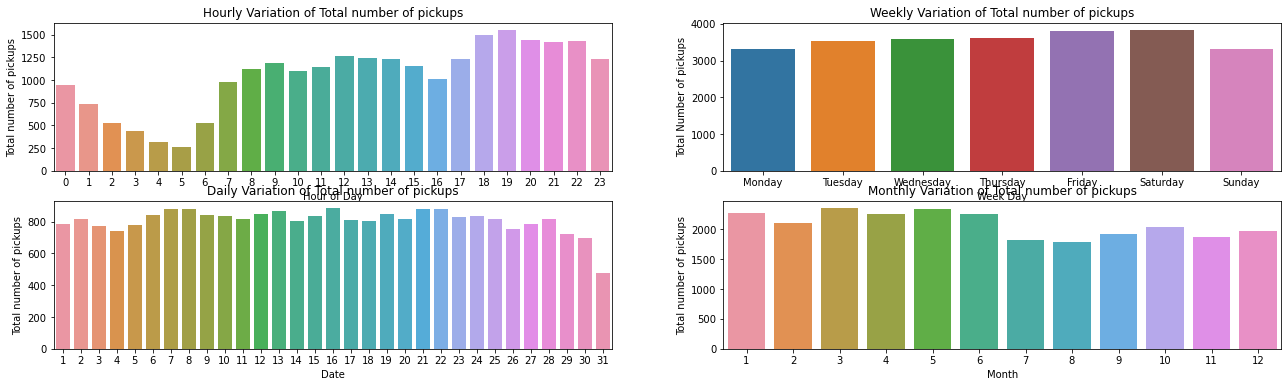

In [30]:
 #Exploratory Data Analysis (EDA)
# Datetime features
plt.figure(figsize=(22, 6))

# Hour of day
plt.subplot(221)
sb.countplot(df['pickup_hour'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

# Date
plt.subplot(223)
sb.countplot(df['pickup_date'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')

# Day of week
plt.subplot(222)
sb.countplot(df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

# Month
plt.subplot(224)
sb.countplot(df['pickup_month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups');

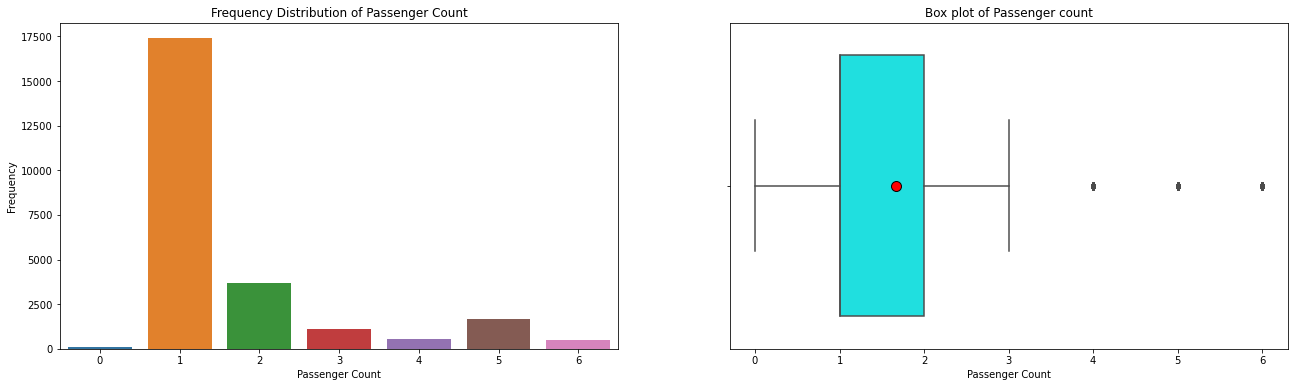

In [31]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sb.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Passenger Count')

plt.subplot(122)
sb.boxplot(df['passenger_count'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title('Box plot of Passenger count');

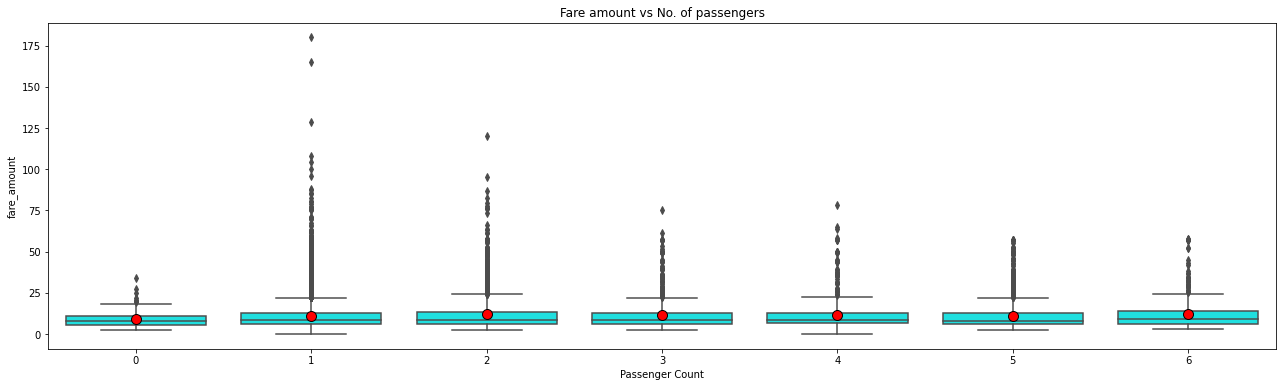

In [32]:
plt.figure(figsize=(22, 6))  #Most of the trips involve only 1 passenger. There are trips with zero passengers but they are very low in number
sb.boxplot(x = df['passenger_count'],y = df['fare_amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("Fare amount vs No. of passengers");

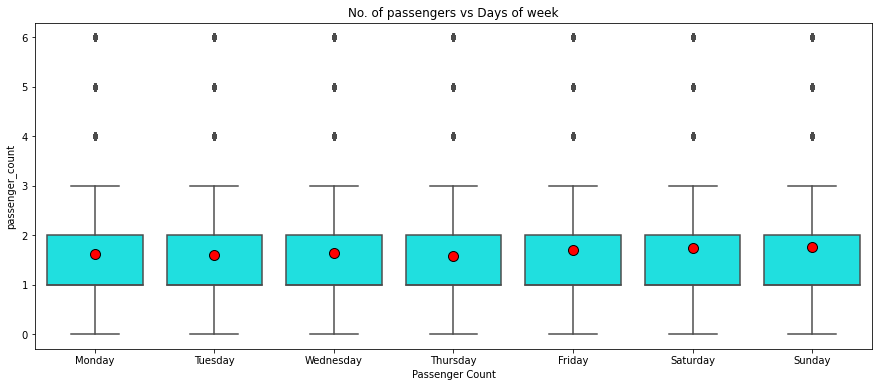

In [33]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = df['passenger_count'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("No. of passengers vs Days of week");

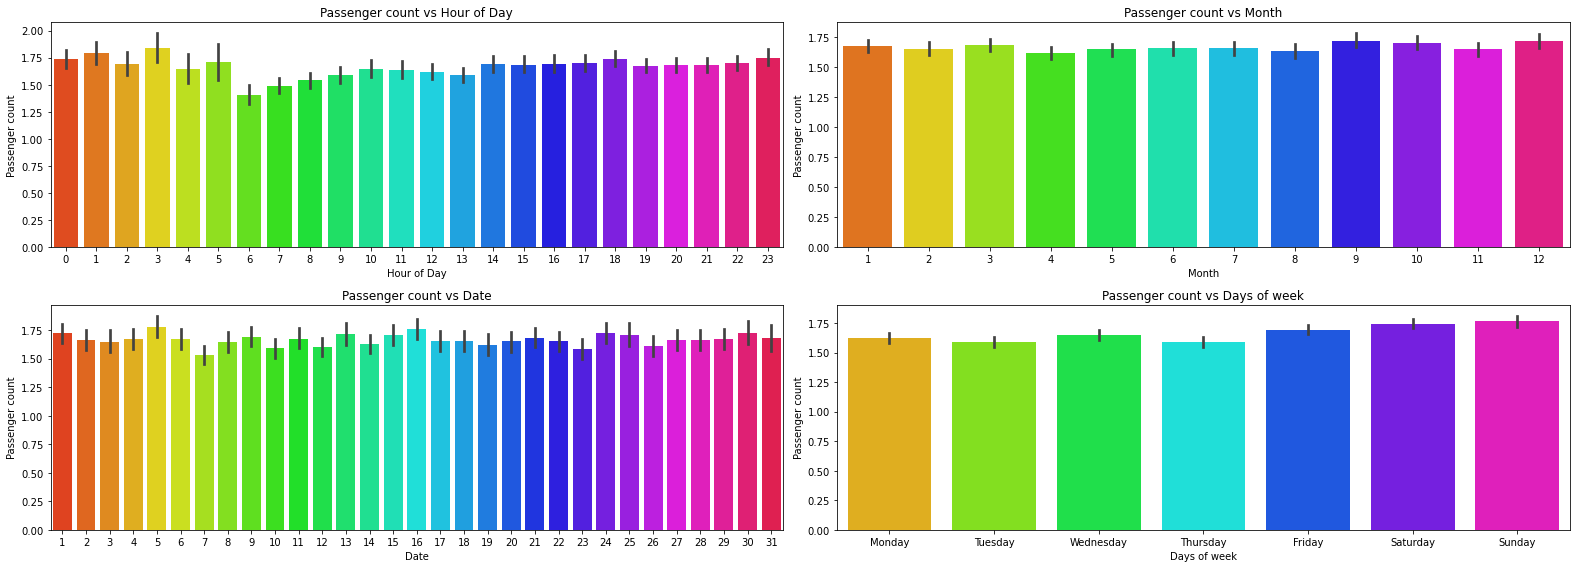

In [34]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['passenger_count'], palette = 'hsv')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['passenger_count'],palette = 'hsv')
plt.xlabel('Month')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['passenger_count'], palette = 'hsv')
plt.xlabel('Date')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['passenger_count'], palette = 'hsv')
plt.xlabel('Days of week')
plt.ylabel('Passenger count')
plt.title ("Passenger count vs Days of week")
plt.tight_layout();

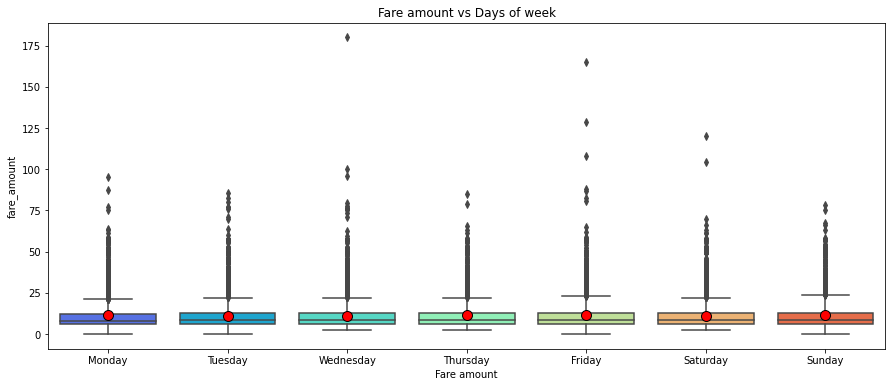

In [35]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['fare_amount'], palette = 'rainbow', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('Fare amount')
plt.title ("Fare amount vs Days of week");

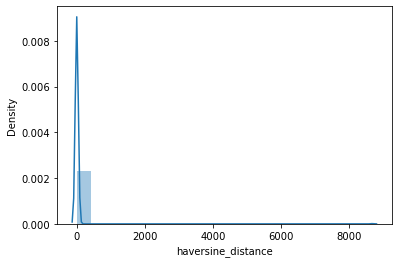

In [36]:
sb.distplot(df['haversine_distance'], bins = 20); #Dealing with Distance Outliers

In [37]:
df['haversine_distance'].describe(), print("Median", df['haversine_distance'].median())

Median 2.133851933097522


(count    25000.000000
 mean        16.648109
 std        332.369850
 min          0.000000
 25%          1.227109
 50%          2.133852
 75%          3.874803
 max       8667.542104
 Name: haversine_distance, dtype: float64,
 None)

In [38]:
df['haversine_distance'].quantile(0.25), df['haversine_distance'].quantile(0.75)

(1.2271090308248453, 3.8748025868280696)

In [39]:
IQR = df['haversine_distance'].quantile(0.75) - df['haversine_distance'].quantile(0.25)
IQR

2.647693556003224

In [40]:
Q1 = df['haversine_distance'].quantile(0.25)
Q3 = df['haversine_distance'].quantile(0.75)
whisker_1 = Q1 - (1.5*IQR)
whisker_2 = Q3 + (1.5*IQR)

whisker_1, whisker_2

(-2.744431303179991, 7.846342920832906)

In [41]:
df = df.loc[(df['haversine_distance']!=0) & (df['haversine_distance']<8)]
df.shape   #Replacing outliers with whisker values is one of the methods of treating outliers

(22204, 16)

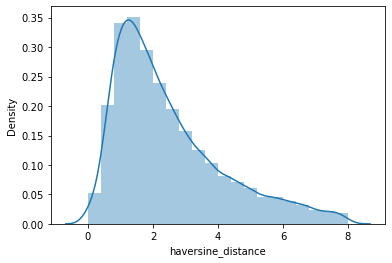

In [42]:
sb.distplot(df['haversine_distance'], bins = 20)
plt.show()

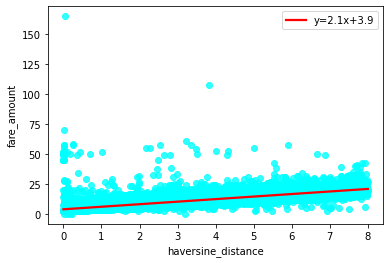

In [43]:
from scipy import stats #Target Exploration with distance
x = df['haversine_distance']
y = df['fare_amount']
slope, intercept, r_value, p_value, std_err = stats.linregress(df['haversine_distance'],df['fare_amount'])
ax = sb.regplot(x, y, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 
                                "color": "red"},scatter_kws={"color": "cyan"})
ax.legend();

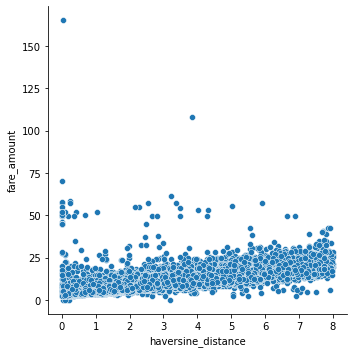

In [44]:
#sb.lmplot(x="haversine_distance", y="fare_amount", data=df );
sb.relplot(x="haversine_distance", y="fare_amount", data=df, kind="scatter");

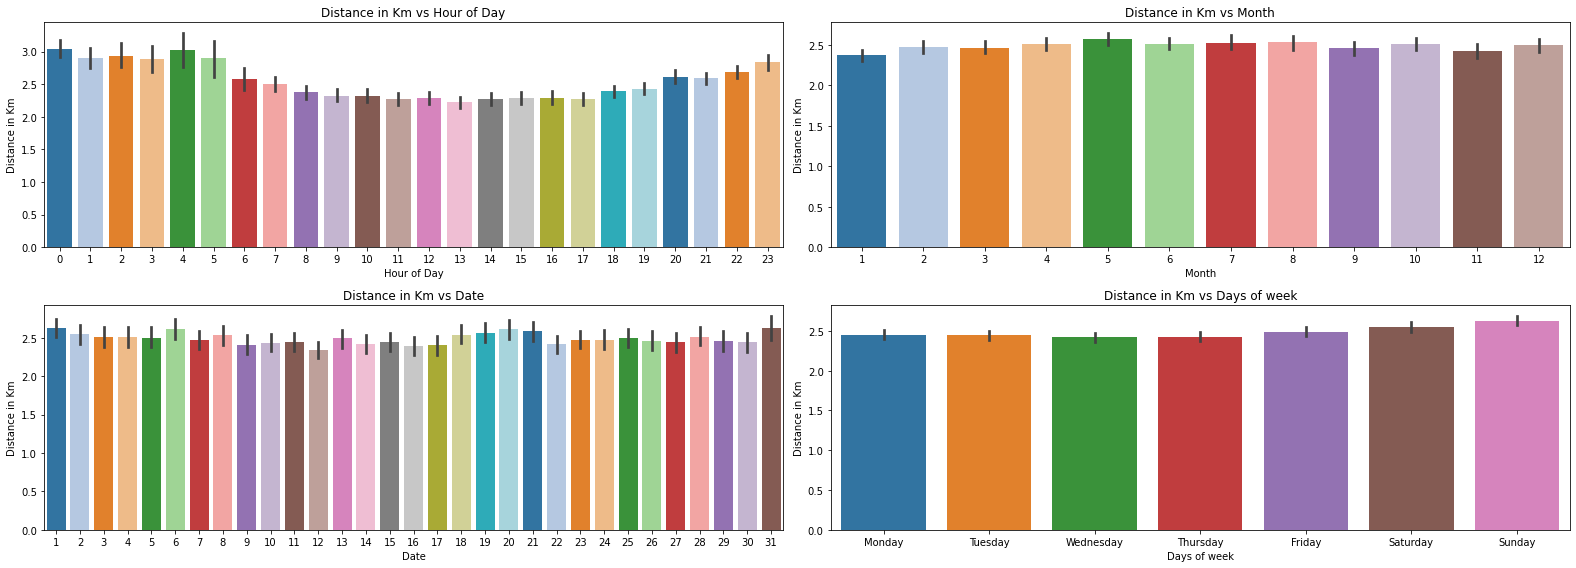

In [45]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['haversine_distance'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['haversine_distance'],palette = 'tab20',estimator = np.mean)
plt.xlabel('Month')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['haversine_distance'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['haversine_distance'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Distance in Km')
plt.title ("Distance in Km vs Days of week")
plt.tight_layout();

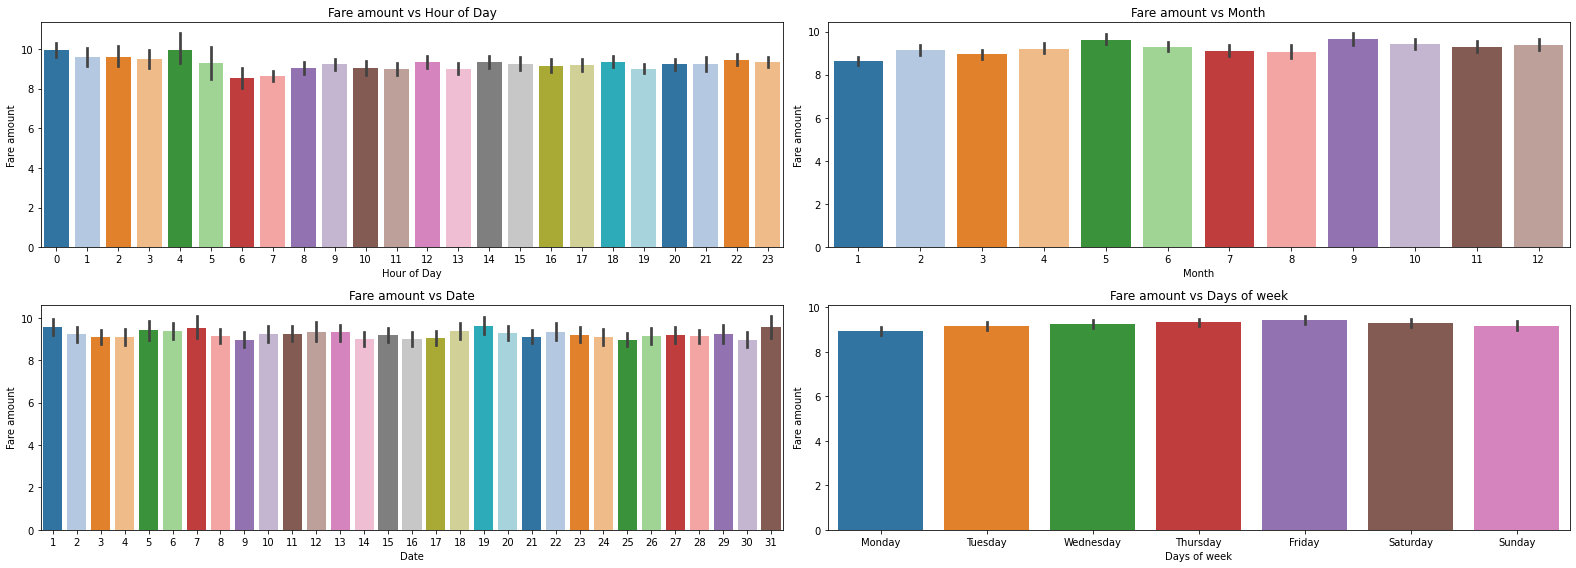

In [46]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.barplot(df['pickup_hour'], y = df['fare_amount'], palette = 'tab20')
plt.xlabel('Hour of Day')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Hour of Day")

# Day of week
plt.subplot(222)
sb.barplot(df['pickup_month'], y = df['fare_amount'],palette = 'tab20')
plt.xlabel('Month')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Month")

# Date
plt.subplot(223)
sb.barplot(x = df['pickup_date'], y = df['fare_amount'], palette = 'tab20')
plt.xlabel('Date')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Date")

# Month
plt.subplot(224)
sb.barplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['fare_amount'], palette = 'tab10')
plt.xlabel('Days of week')
plt.ylabel('Fare amount')
plt.title ("Fare amount vs Days of week")
plt.tight_layout();

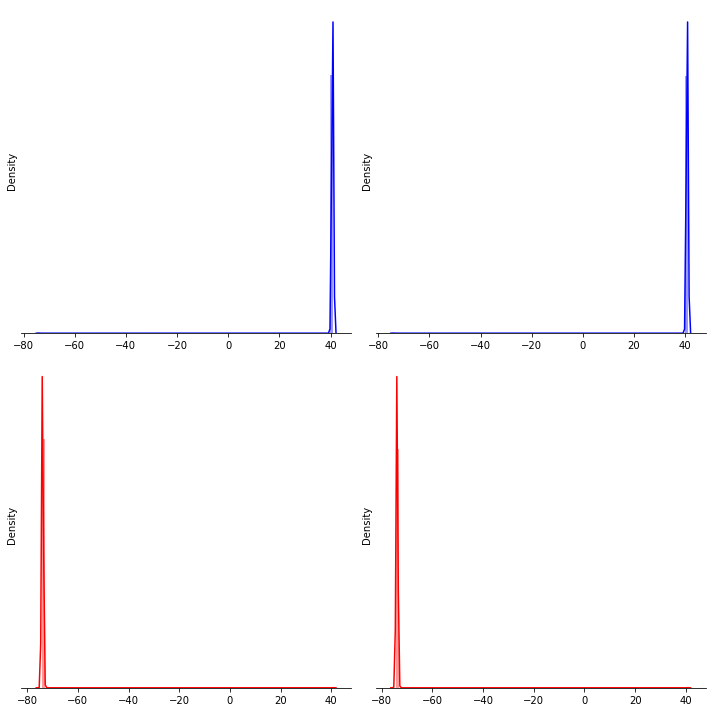

In [47]:
#Lattitude & Longitude
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sb.despine(left=True)
sb.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sb.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sb.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

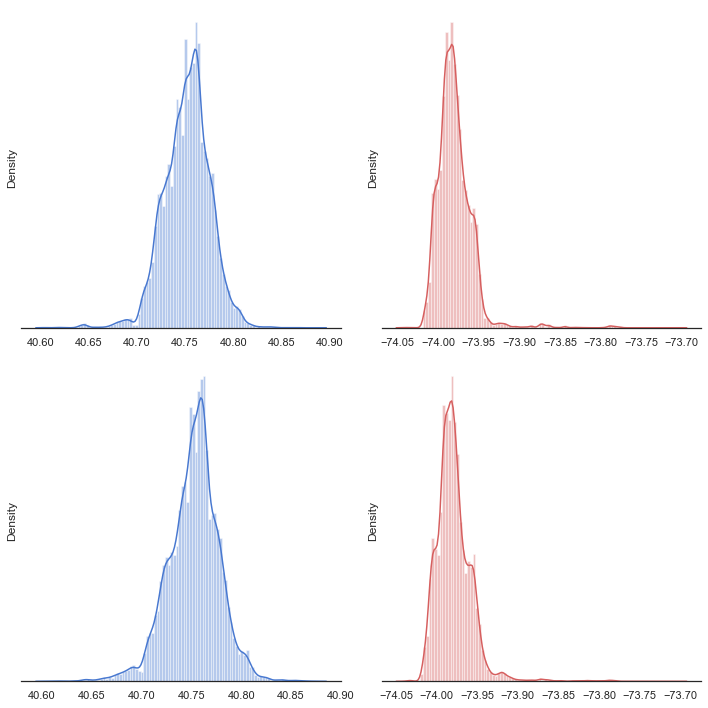

In [48]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]
df_data_new = df.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df_data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(df_data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sb.distplot(df_data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sb.distplot(df_data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [49]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X =df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount'], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  
print(vif_data)

               feature           VIF
0     pickup_longitude  1.819521e+07
1      pickup_latitude  5.215797e+06
2    dropoff_longitude  1.860771e+07
3     dropoff_latitude  4.620425e+06
4      passenger_count  2.677169e+00
5          pickup_hour  9.927962e+00
6          pickup_date  4.272057e+00
7         pickup_month  4.273607e+00
8           pickup_day  3.439230e+00
9            base_fare  9.145846e+01
10                fare  5.423420e+00
11  haversine_distance  6.658801e+00


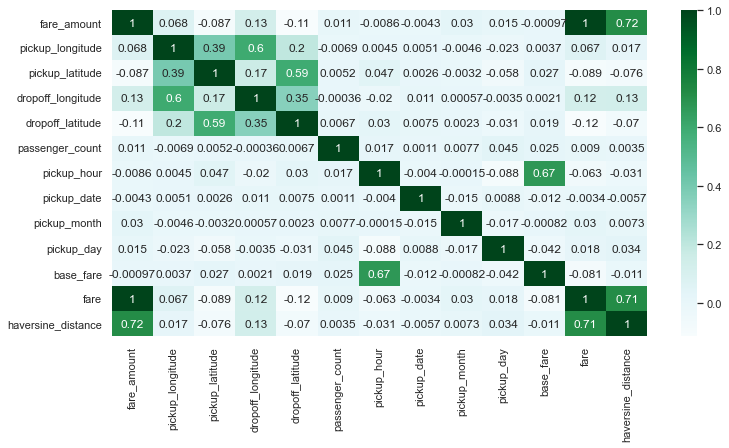

In [50]:
plt.figure(figsize = (12,6))
sb.heatmap(df.drop(['key', 'pickup_datetime','pickup_weekday'], axis = 1).corr(), 
           cmap ='BuGn', annot = True);  #Correlation matrix
#Correlation heatmap to check the correlations amongst all features.

In [61]:
#Data scaling & Train Test split
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22165 entries, 0 to 24999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   key                 22165 non-null  object             
 1   fare_amount         22165 non-null  float64            
 2   pickup_datetime     22165 non-null  datetime64[ns, UTC]
 3   pickup_longitude    22165 non-null  float64            
 4   pickup_latitude     22165 non-null  float64            
 5   dropoff_longitude   22165 non-null  float64            
 6   dropoff_latitude    22165 non-null  float64            
 7   passenger_count     22165 non-null  int64              
 8   pickup_hour         22165 non-null  int64              
 9   pickup_weekday      22165 non-null  object             
 10  pickup_date         22165 non-null  int64              
 11  pickup_month        22165 non-null  int64              
 12  pickup_day          22165 non-nu

In [62]:
X = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount', 'fare', 'base_fare', 'pickup_latitude', 'pickup_hour'], 
            axis = 1)
y = df['fare_amount']

In [63]:
#Data Standardization give data zero mean and unit variance
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 6.22162187,  5.97152851, -1.56305925, -0.5169239 , -0.08068844,
        -0.07287515, -1.54585392, -0.86686907],
       [-0.12886493, -0.56169134, -0.06794214,  0.25807733,  0.26479628,
         0.50514516, -0.01560283, -0.65344876],
       [-0.33035263, -0.57588146,  0.22612932, -0.5169239 ,  0.610281  ,
        -0.65089546,  1.00456456,  0.18518188],
       [ 0.54289837,  0.94844336,  1.22862792, -0.5169239 , -0.77165788,
        -0.93990562, -1.03577022, -0.29079048],
       [-0.96500219,  0.23950482,  0.23163584, -0.5169239 , -1.1171426 ,
        -1.51792593, -0.01560283,  0.77290586]])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.ndim)
print(y_train.ndim)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

2
1
(15515, 8)
(15515,)
(6650, 8)
(6650,)


In [65]:
#mean prediction
from sklearn.metrics import mean_squared_error
from math import sqrt
mean_pred = np.repeat(y_train.mean(),len(y_test))
sqrt(mean_squared_error(y_test, mean_pred))

5.016567141528373

In [66]:
#Model development
pip install -q --upgrade linear-tree

SyntaxError: invalid syntax (Temp/ipykernel_11552/3384075558.py, line 2)

In [67]:
#LINEAR REGRESSION
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
np.mean(cross_val_score(lr, X_train, y_train, cv=5))

0.5194654340915779

In [68]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lr, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
df_train = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount', 'fare', 'base_fare',
                    'pickup_latitude', 'pickup_hour'], axis = 1)
coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance    3.531579
dropoff_latitude      0.427465
pickup_longitude      0.230937
dropoff_longitude     0.162521
pickup_month          0.119079
pickup_day            0.069679
passenger_count       0.053526
pickup_date           0.000571
dtype: float64

In [69]:
#RIDGE REGRESSION
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.5184079597922984

In [70]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ridge, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)

coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance    3.528671
dropoff_latitude      0.427423
pickup_longitude      0.230521
dropoff_longitude     0.162999
pickup_month          0.119012
pickup_day            0.069512
passenger_count       0.053484
pickup_date           0.000571
dtype: float64

In [71]:
#LASSO REGRESSION
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5).fit(X_train, y_train)
lasso.score(X_train, y_train)

0.5184045455853128

In [72]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(lasso, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)
coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance    3.528827
dropoff_latitude      0.422048
pickup_longitude      0.228588
dropoff_longitude     0.158616
pickup_month          0.115666
pickup_day            0.065800
passenger_count       0.049771
pickup_date           0.000194
dtype: float64

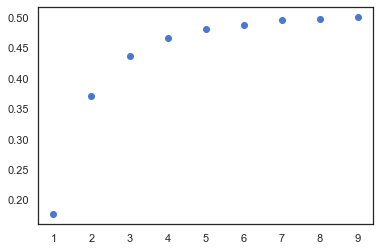

In [73]:
#K-Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsRegressor
cv_score=[]
for i in range(1,10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn,X_train, y_train,cv=5)))
x = range(1,10)
plt.scatter(x,cv_score);

In [74]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
R_Squared = np.mean(cross_val_score(DT, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(DT, X_train, y_train, cv=5))
print('R2 of Decision Tree Regression model is:',R_Squared)
print('Standard deviation of R2 of Decision Tree Regression model is:',Standard_deviation)

R2 of Decision Tree Regression model is: 0.21531470970281702
Standard deviation of R2 of Decision Tree Regression model is: 0.1569127991146833


In [83]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
R_Squared = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(rf, X_train, y_train, cv=5))
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

R2 of Random Forest Regression model is: 0.5342968570314427
Standard deviation of R2 of Random Forest Regression model is: 0.0405295635651868


In [76]:
#Gradient boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
np.mean(cross_val_score(GB, X_train, y_train, cv=5))

0.5660561586232925

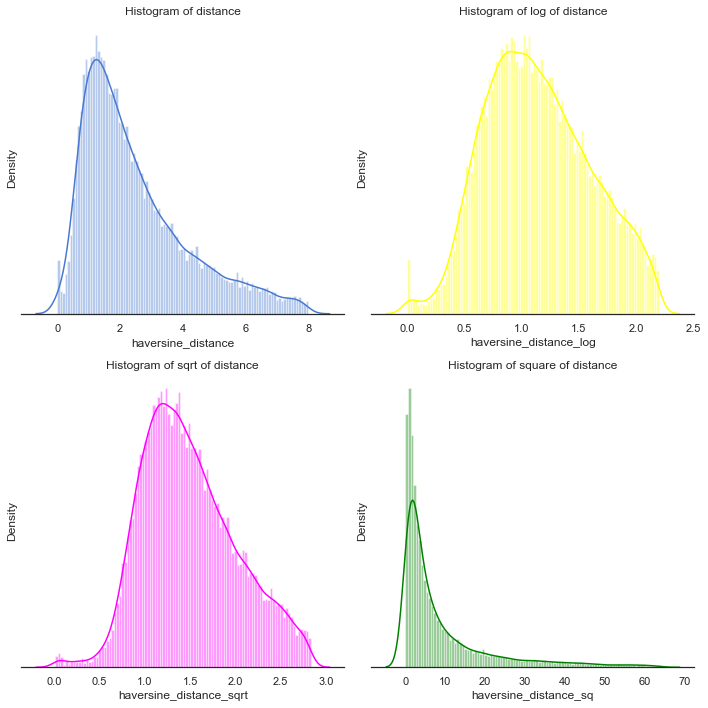

In [80]:
#Feature transformation of Haversine distance
df['haversine_distance_log'] = np.log(df['haversine_distance'].values + 1)
df['haversine_distance_sqrt'] = np.sqrt(df['haversine_distance'].values)
df['haversine_distance_sq'] = df['haversine_distance'].values**2
df_test['haversine_distance_log'] = np.log(df_test['haversine_distance'].values + 1)
df_test['haversine_distance_sqrt'] = np.sqrt(df_test['haversine_distance'].values)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)#
sb.despine(left=True)
sb.distplot(df['haversine_distance'], label = 'haversine_distance',color="b",bins = 100, ax=axes[0,0])
axes[0,0].set_title('Histogram of distance')
sb.distplot(df['haversine_distance_log'], label = 'haversine_distance_log',color="yellow",bins =100, ax=axes[0,1])
axes[0,1].set_title('Histogram of log of distance')
sb.distplot(df['haversine_distance_sqrt'], label = 'haversine_distance_sqrt',color="magenta",bins =100, ax=axes[1, 0])
axes[1,0].set_title('Histogram of sqrt of distance')
sb.distplot(df['haversine_distance_sq'], label = 'haversine_distance_sq',color="green",bins =100, ax=axes[1, 1])
axes[1,1].set_title('Histogram of square of distance')
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

In [85]:
df_train = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare_amount','fare', 'base_fare', 'haversine_distance_sq', 
                    'pickup_hour'], axis = 1)
df_test_copy = df_test.drop(['key', 'base_fare', 'pickup_datetime','pickup_weekday', 'pickup_hour'], axis = 1)
X = df_train.copy()
y = df['fare_amount']
scaler = preprocessing.StandardScaler()
X= scaler.fit(X).transform(X)
test_X= scaler.transform(df_test_copy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.model_selection import cross_validate
cv_results = cross_validate(ridge, X_train, y_train, cv=5, return_estimator=True)

Coefficient = []
for model in cv_results['estimator']:
    Coefficient.append(model.coef_)

coefficient = pd.DataFrame(Coefficient, columns = df_train.columns)
abs(coefficient.mean(axis =0)).sort_values(ascending = False)

haversine_distance_sqrt    24.132647
haversine_distance_log     17.575192
haversine_distance         10.245049
dropoff_latitude            0.332328
pickup_longitude            0.254061
pickup_month                0.164381
dropoff_longitude           0.070822
pickup_day                  0.056965
passenger_count             0.040981
pickup_date                 0.019340
pickup_latitude             0.007621
dtype: float64

In [86]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV(cv=5).fit(X_train, y_train)
ridge.score(X_train, y_train)

0.5691511886768357

In [87]:
df_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_weekday,pickup_date,pickup_month,pickup_day,base_fare,haversine_distance,haversine_distance_log,haversine_distance_sqrt
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,13,Tuesday,27,1,1,2.5,2.323260,1.200946,1.524224
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,13,Tuesday,27,1,1,2.5,2.425353,1.231205,1.557354
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,11,Saturday,8,10,5,2.5,0.618628,0.481579,0.786529
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,21,Saturday,1,12,5,3.0,1.961033,1.085538,1.400369
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,21,Saturday,1,12,5,3.0,5.387301,1.854312,2.321056


In [105]:
#Model Evaluation
def model_train_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score, mean_absolute_percentage_error
    print("\n \n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('Mean absolute percentage error (MAPE) of', model_name,':', mean_absolute_percentage_error(y, ypred))
    print('Explained Variance Score (EVS) of', model_name,':', explained_variance_score(y, ypred))
    print('R2 of', model_name,':', (r2_score(y, ypred)).round(2))
    print('\n \n')
    
    # Actual vs Predicted Plot
    f, ax = plt.subplots(figsize=(12,6),dpi=100);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Fare amount')
    plt.ylabel('Fare amount')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
    f.text(0.95, 0.06, 'AUTHOR: VAISAK GOPALAKRISHNAN',
         fontsize=12, color='green',
         ha='left', va='bottom', alpha=0.5);
    plt.show()


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 1.8978067191438868
Mean Squared Error(MSE) of Linear regression Model : 9.29452566018817
Root Mean Squared Error (RMSE) of Linear regression Model : 3.0486924509022173
Mean absolute percentage error (MAPE) of Linear regression Model : 116070515624543.6
Explained Variance Score (EVS) of Linear regression Model : 0.5783901603013044
R2 of Linear regression Model : 0.58

 



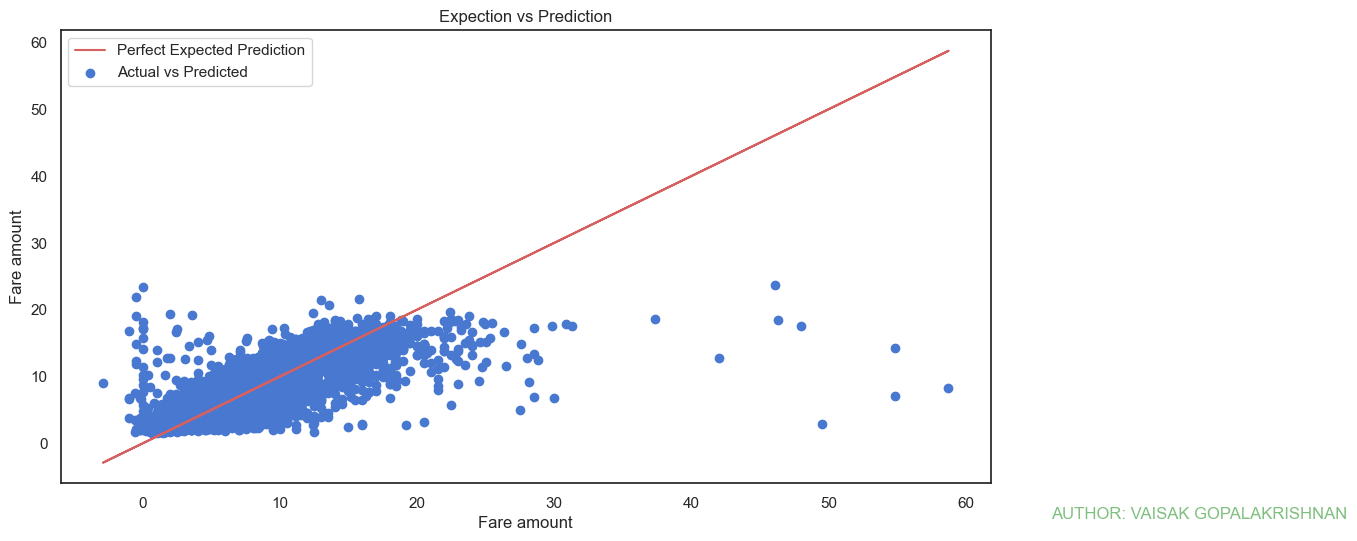

In [106]:
#Linear regression evaluation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')

In [90]:
test_pred = lr.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['fare_amount'])
Submission['key'] = df_test['key']
Submission = Submission[['key', 'fare_amount']]
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.790209
1,2015-01-27 13:08:24.0000003,8.897364
2,2011-10-08 11:53:44.0000002,5.238035
3,2012-12-01 21:12:12.0000002,8.145974
4,2012-12-01 21:12:12.0000003,16.013251



 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Ridge regression Model : 1.8953277700854587
Mean Squared Error(MSE) of Ridge regression Model : 9.223889520243969
Root Mean Squared Error (RMSE) of Ridge regression Model : 3.0370856952420637
Mean absolute percentage error (MAPE) of Ridge regression Model : 110009666440737.19
Explained Variance Score (EVS) of Ridge regression Model : 0.5816091670061001
R2 of Ridge regression Model : 0.58

 



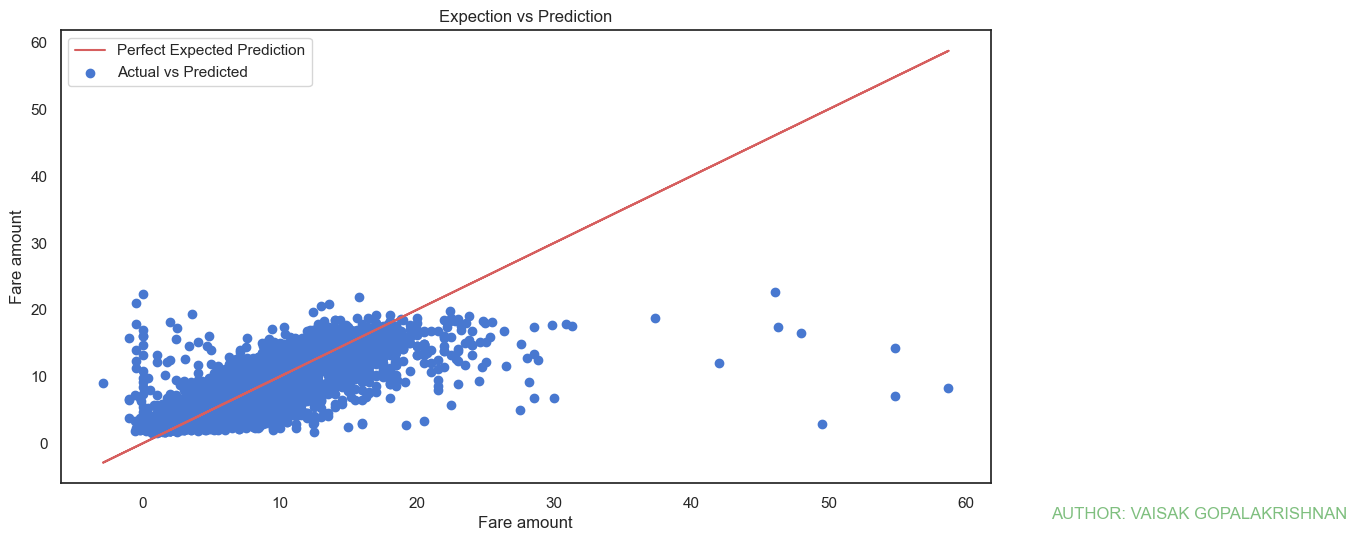

In [107]:
#Ridge regression evaluation
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit (X_train, y_train)
Yhat_ridge = ridge.predict(X_test)
model_train_evaluation(y_test, Yhat_ridge, 'Ridge regression Model')

In [92]:
test_pred = ridge.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['fare_amount'])
Submission['key'] = df_test['key']
Submission = Submission[['key', 'fare_amount']]
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.769966
1,2015-01-27 13:08:24.0000003,8.878054
2,2011-10-08 11:53:44.0000002,5.287526
3,2012-12-01 21:12:12.0000002,8.129828
4,2012-12-01 21:12:12.0000003,16.003929



 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Random Forest Regression Model : 1.8716032631578945
Mean Squared Error(MSE) of Random Forest Regression Model : 9.591926264007519
Root Mean Squared Error (RMSE) of Random Forest Regression Model : 3.097083509369342
Mean absolute percentage error (MAPE) of Random Forest Regression Model : 101224124244227.8
Explained Variance Score (EVS) of Random Forest Regression Model : 0.5662847639662717
R2 of Random Forest Regression Model : 0.56

 



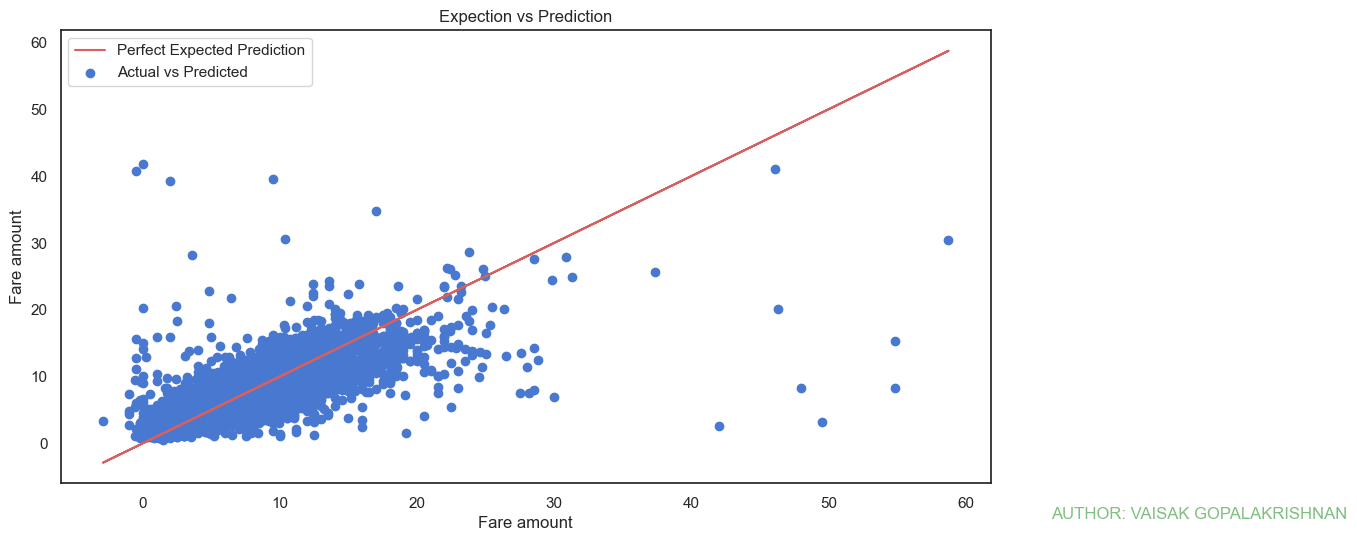

In [108]:
#Random Forest regression evaluation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit (X_train, y_train)
Yhat_rf = rf.predict(X_test)
model_train_evaluation(y_test, Yhat_rf, 'Random Forest Regression Model')

In [94]:
test_pred = rf.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['fare_amount'])
Submission['key'] = df_test['key']
Submission = Submission[['key', 'fare_amount']]
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.351
1,2015-01-27 13:08:24.0000003,8.579
2,2011-10-08 11:53:44.0000002,4.571
3,2012-12-01 21:12:12.0000002,8.633
4,2012-12-01 21:12:12.0000003,16.764



 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Gradient Boosting Regression Model : 1.8417491336128575
Mean Squared Error(MSE) of Gradient Boosting Regression Model : 9.199863800310418
Root Mean Squared Error (RMSE) of Gradient Boosting Regression Model : 3.0331277256835754
Mean absolute percentage error (MAPE) of Gradient Boosting Regression Model : 112993352790112.3
Explained Variance Score (EVS) of Gradient Boosting Regression Model : 0.58248643301562
R2 of Gradient Boosting Regression Model : 0.58

 



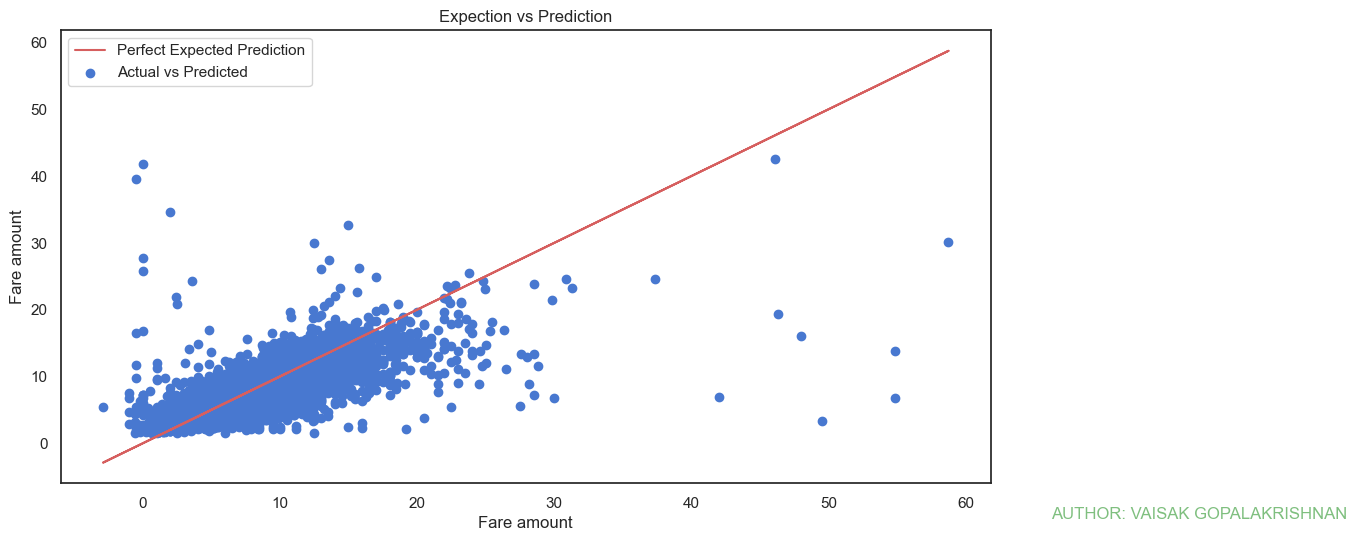

In [109]:
#GradientBoosting regression evaluation
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit (X_train, y_train)
Yhat_GB = GB.predict(X_test)
model_train_evaluation(y_test, Yhat_GB, 'Gradient Boosting Regression Model')

In [96]:
test_pred = GB.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['fare_amount'])
Submission['key'] = df_test['key']
Submission = Submission[['key', 'fare_amount']]
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.010944
1,2015-01-27 13:08:24.0000003,8.847381
2,2011-10-08 11:53:44.0000002,5.359064
3,2012-12-01 21:12:12.0000002,8.353213
4,2012-12-01 21:12:12.0000003,15.854220


In [99]:
Submission.to_csv('Submission.csv', index = False)

In [110]:
df_test['haversine_distance_log'] = np.log(df_test['haversine_distance'].values + 1)
df_test['haversine_distance_sqrt'] = np.sqrt(df_test['haversine_distance'].values)
df_train = df.drop(['key', 'pickup_datetime','pickup_weekday', 'fare', 'fare_amount', 'base_fare', 'haversine_distance_sq', 
                    'pickup_hour'], axis = 1)
df_test_copy = df_test.drop(['key', 'base_fare', 'pickup_datetime','pickup_weekday', 'pickup_hour'], axis = 1)
X = df_train.copy()
y = df['fare']
scaler = preprocessing.StandardScaler()
X= scaler.fit(X).transform(X)
test_X= scaler.transform(df_test_copy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


 
 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear regression Model : 1.9507618061884364
Mean Squared Error(MSE) of Linear regression Model : 12.487453411164369
Root Mean Squared Error (RMSE) of Linear regression Model : 3.533759104857654
Mean absolute percentage error (MAPE) of Linear regression Model : 153665340694379.72
Explained Variance Score (EVS) of Linear regression Model : 0.534159422815844
R2 of Linear regression Model : 0.53

 



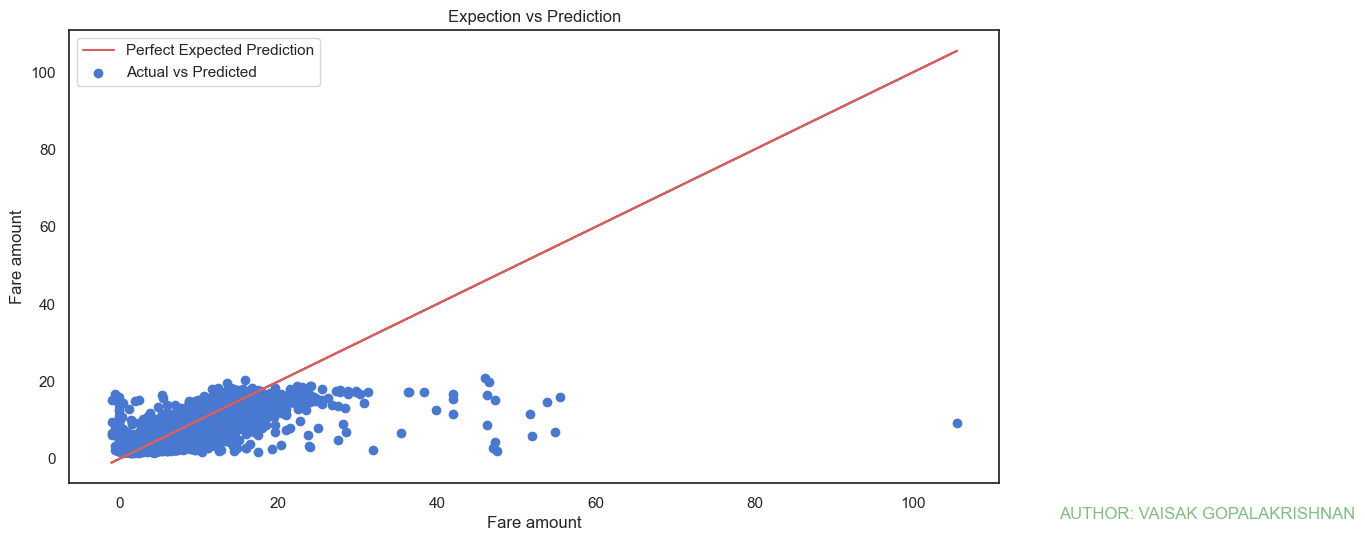

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit (X_train, y_train)
Yhat_lr = lr.predict(X_test)
model_train_evaluation(y_test, Yhat_lr, 'Linear regression Model')

In [112]:
test_pred = lr.predict(test_X)
Submission = pd.DataFrame(test_pred, columns = ['fare_amount'])
Submission['key'] = df_test['key']
Submission = Submission[['key', 'fare_amount']]
Submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,6.092969
1,2015-01-27 13:08:24.0000003,6.187475
2,2011-10-08 11:53:44.0000002,2.296580
3,2012-12-01 21:12:12.0000002,5.264793
4,2012-12-01 21:12:12.0000003,12.957689
